## Download dataset from roboflow (yolov5 version of dataset)

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="KZo2u7XZFUW0de237okd")
project = rf.workspace("workspace-5ujvu").project("basketball-players-fy4c2-vfsuv")
version = project.version(17)
dataset = version.download("yolov5")
                

/Users/mattzidell/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Basketball-Players-17 in yolov5pytorch:: 100%|██████████| 652/652 [00:00<00:00, 8956.79it/s]


(After  running, move the `Basketball-Players-17` folder inside the `data` folder.)

## EDA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load class names from data.yaml
data_yaml_path = Path('../data/Basketball-Players-17/data.yaml')
with open(data_yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

class_names = data_config['names']
num_classes = data_config['nc']

print(f"Dataset: {num_classes} classes")
print(f"Classes: {class_names}")
print(f"\nClass ID mapping:")
for idx, name in enumerate(class_names):
    print(f"  {idx}: {name}")

Dataset: 7 classes
Classes: ['Ball', 'Clock', 'Hoop', 'Overlay', 'Player', 'Ref', 'Scoreboard']

Class ID mapping:
  0: Ball
  1: Clock
  2: Hoop
  3: Overlay
  4: Player
  5: Ref
  6: Scoreboard


In [3]:
data_config

{'names': ['Ball', 'Clock', 'Hoop', 'Overlay', 'Player', 'Ref', 'Scoreboard'],
 'nc': 7,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'basketball-players-fy4c2-vfsuv',
  'url': 'https://universe.roboflow.com/workspace-5ujvu/basketball-players-fy4c2-vfsuv/dataset/17',
  'version': 17,
  'workspace': 'workspace-5ujvu'},
 'test': '../test/images',
 'train': 'Basketball-Players-17/train/images',
 'val': 'Basketball-Players-17/valid/images'}

#### Load and Parse All Label Files

In [2]:
def parse_yolo_labels(label_dir):
    """Parse all YOLO label files in a directory"""
    annotations = []
    label_path = Path(label_dir)
    
    for label_file in label_path.glob('*.txt'):
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    annotations.append({
                        'file': label_file.name,
                        'class_id': int(class_id),
                        'class_name': class_names[int(class_id)],
                        'x_center': x_center,
                        'y_center': y_center,
                        'width': width,
                        'height': height,
                        'area': width * height
                    })
    
    return pd.DataFrame(annotations)

# Parse labels from all splits
print("Parsing labels...")
train_df = parse_yolo_labels('../data/Basketball-Players-17/train/labels')
valid_df = parse_yolo_labels('../data/Basketball-Players-17/valid/labels')
test_df = parse_yolo_labels('../data/Basketball-Players-17/test/labels')

train_df['split'] = 'train'
valid_df['split'] = 'valid'
test_df['split'] = 'test'

# Combine all data
all_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

print(f"\nTotal annotations: {len(all_df):,}")
print(f"  Train: {len(train_df):,}")
print(f"  Valid: {len(valid_df):,}")
print(f"  Test: {len(test_df):,}")
print(f"\nUnique images: {all_df['file'].nunique():,}")

Parsing labels...

Total annotations: 4,640
  Train: 3,686
  Valid: 483
  Test: 471

Unique images: 320


In [6]:
train_df

,file,class_id,class_name,x_center,y_center,width,height,area,split
0,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,2,Hoop,0.258594,0.449219,0.025000,0.037500,0.000937,train
1,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.373437,0.660156,0.060937,0.159375,0.009712,train
2,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.327344,0.544531,0.028906,0.115625,0.003342,train
3,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.313281,0.569531,0.026562,0.113281,0.003009,train
4,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.409375,0.592187,0.032813,0.148438,0.004871,train
...,...,...,...,...,...,...,...,...,...
3681,frame_245960_jpg.rf.265706574fa079e909c035f0f6...,4,Player,0.596875,0.814063,0.145313,0.371875,0.054038,train
3682,frame_245960_jpg.rf.265706574fa079e909c035f0f6...,4,Player,0.863281,0.913281,0.106250,0.173437,0.018428,train
3683,frame_245960_jpg.rf.265706574fa079e909c035f0f6...,0,Ball,0.474219,0.177344,0.042188,0.070312,0.002966,train
3684,frame_245960_jpg.rf.265706574fa079e909c035f0f6...,4,Player,0.482031,0.908594,0.095312,0.182812,0.017424,train


#### Class Distribution Analysis

In [7]:
all_df

,file,class_id,class_name,x_center,y_center,width,height,area,split
0,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,2,Hoop,0.258594,0.449219,0.025000,0.037500,0.000937,train
1,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.373437,0.660156,0.060937,0.159375,0.009712,train
2,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.327344,0.544531,0.028906,0.115625,0.003342,train
3,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.313281,0.569531,0.026562,0.113281,0.003009,train
4,Iowa_Nebraska-2023-03-06-college-men_mp4-115_j...,4,Player,0.409375,0.592187,0.032813,0.148438,0.004871,train
...,...,...,...,...,...,...,...,...,...
4635,youtube-91_jpg.rf.028438adab55ceaa6958f774ae5b...,4,Player,0.199219,0.642969,0.164062,0.325000,0.053320,test
4636,youtube-91_jpg.rf.028438adab55ceaa6958f774ae5b...,3,Overlay,0.791406,0.924219,0.282813,0.070312,0.019885,test
4637,youtube-91_jpg.rf.028438adab55ceaa6958f774ae5b...,6,Scoreboard,0.772656,0.923438,0.245312,0.067187,0.016482,test
4638,youtube-91_jpg.rf.028438adab55ceaa6958f774ae5b...,1,Clock,0.707812,0.118750,0.028125,0.064062,0.001802,test


Maximum # of balls in any frame: 1


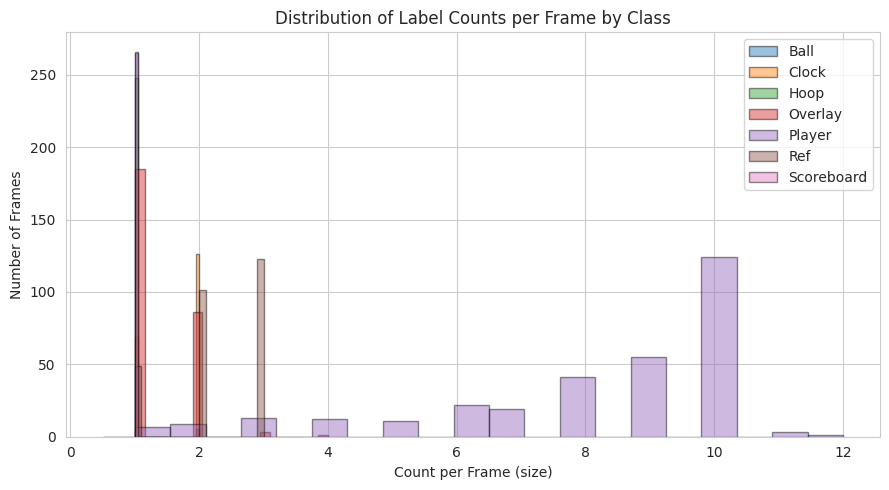

In [3]:
class_count_df = all_df.groupby(['file','class_name'],as_index=False)['class_id'].size()
balls_df = class_count_df[class_count_df['class_name']=='Ball']

print(f"Maximum # of balls in any frame: {max(balls_df['size'])}")

plt.figure(figsize=(9, 5))

for cls, grp in class_count_df.groupby('class_name'):
    plt.hist(grp['size'], bins=20, alpha=0.45, label=cls, edgecolor='black')

plt.title('Distribution of Label Counts per Frame by Class')
plt.xlabel('Count per Frame (size)')
plt.ylabel('Number of Frames')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
class_count_df[(class_count_df['class_name']=='Player')&(class_count_df['size']>10)]

,file,class_name,size
202,frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b13...,Player,11
566,frame_255005_jpg.rf.2ad444d1dc878f89bd47fb724a...,Player,11
637,frame_276922_jpg.rf.9c098a716e67f8448151ff60e2...,Player,12
1260,youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803ae...,Player,11


There are 4 frames in the dataset that contain more than 10 players. This is contradictory to the maximum of 10 players active at any time in a basketball game. These frames may contain false positive annotations, so we will print them and manually inspect them.

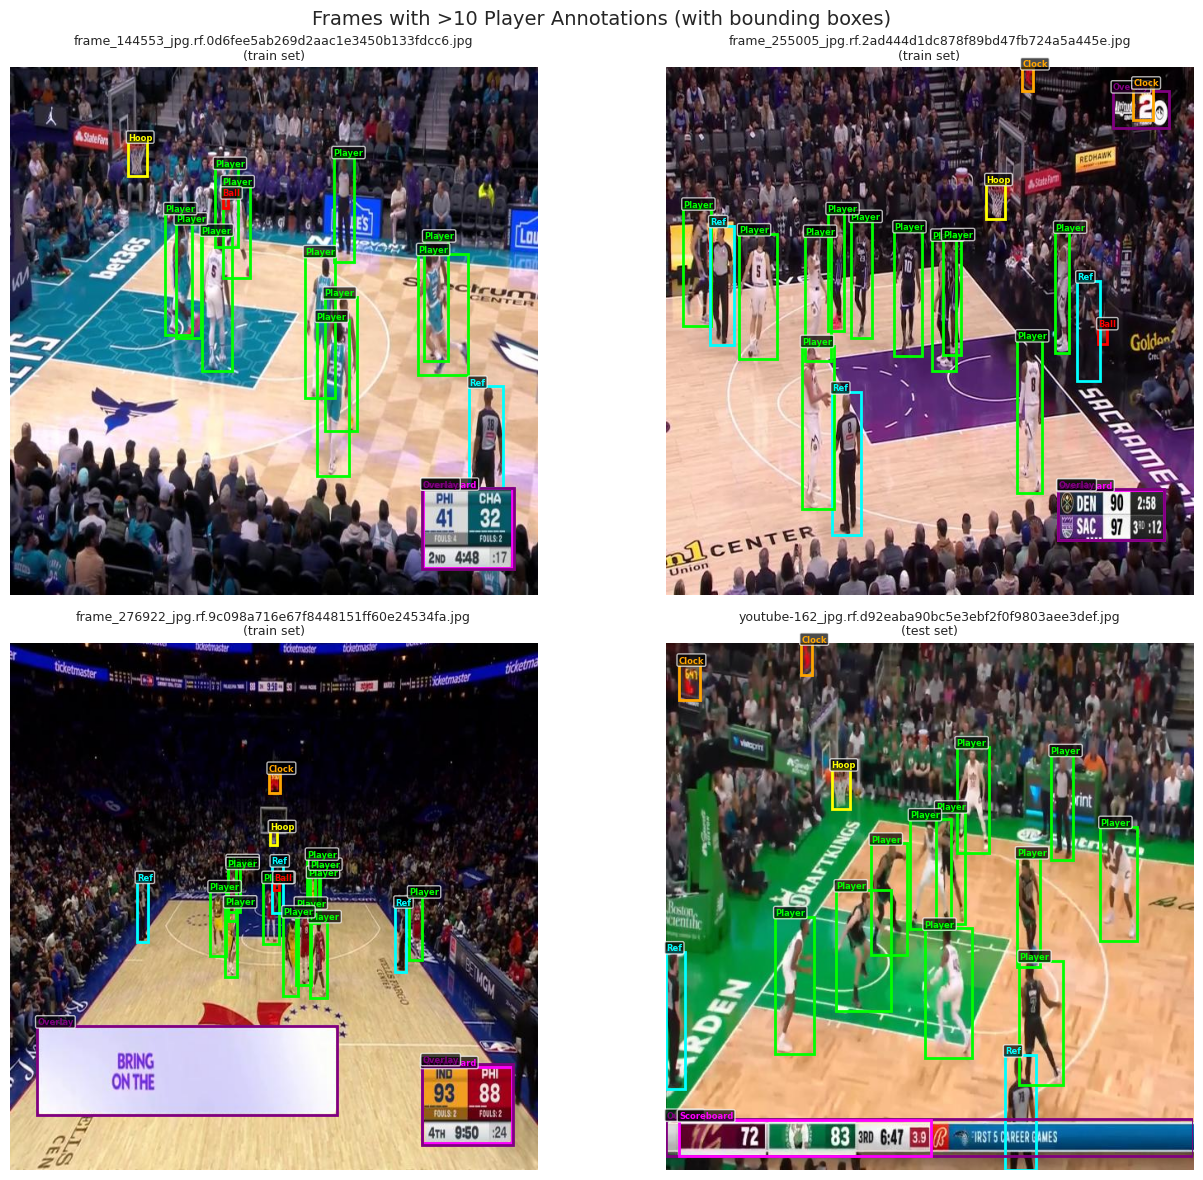

In [5]:
# Display the 4 frames with more than 10 players in a 2x2 grid with bounding boxes
from PIL import Image
import matplotlib.patches as patches

# Get the filenames with >10 players
outlier_files = class_count_df[(class_count_df['class_name']=='Player')&(class_count_df['size']>10)]['file'].tolist()

# Color mapping for each class
colors = {
    'Ball': 'red',
    'Clock': 'orange', 
    'Hoop': 'yellow',
    'Overlay': 'purple',
    'Player': 'lime',
    'Ref': 'cyan',
    'Scoreboard': 'magenta'
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, label_file in enumerate(outlier_files[:4]):
    # Convert label filename to image filename
    img_name = label_file.replace('.txt', '.jpg')
    
    # Search for the image in train, valid, test folders
    for split in ['train', 'valid', 'test']:
        img_path = Path(f'../data/Basketball-Players-17/{split}/images/{img_name}')
        label_path = Path(f'../data/Basketball-Players-17/{split}/labels/{label_file}')
        
        if img_path.exists():
            img = Image.open(img_path)
            img_w, img_h = img.size
            
            axes[idx].imshow(img)
            
            # Draw bounding boxes from label file
            if label_path.exists():
                with open(label_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) == 5:
                            class_id, x_center, y_center, width, height = map(float, parts)
                            class_name = class_names[int(class_id)]
                            
                            # Convert YOLO format to pixel coordinates
                            x = (x_center - width/2) * img_w
                            y = (y_center - height/2) * img_h
                            w = width * img_w
                            h = height * img_h
                            
                            # Draw rectangle
                            rect = patches.Rectangle((x, y), w, h, 
                                                     linewidth=2, 
                                                     edgecolor=colors.get(class_name, 'white'),
                                                     facecolor='none')
                            axes[idx].add_patch(rect)
                            
                            # Add label
                            axes[idx].text(x, y-2, class_name, fontsize=6, 
                                          color=colors.get(class_name, 'white'),
                                          fontweight='bold',
                                          bbox=dict(boxstyle='round,pad=0.2', 
                                                   facecolor='black', alpha=0.7))
            
            axes[idx].set_title(f'{img_name}\n({split} set)', fontsize=9)
            axes[idx].axis('off')
            break

plt.suptitle('Frames with >10 Player Annotations (with bounding boxes)', fontsize=14)
plt.tight_layout()
plt.show()

When manually analyzing the frames, we find that 2 of the frames captured moments where substitutions happened, which makes having more than 10 players valid in those unique cases. However, in the other 2 frames, we find that a ref was incorrectly labeled as a player. We will remove those incorrectly labeled frames from the dataset.

In [6]:
import shutil

def move_frames_to_deleted(image_names, dataset_root='../data/Basketball-Players-17'):
    """
    Move image and label files to a 'deleted' folder for incorrectly labeled frames.
    
    Args:
        image_names: List of image filenames (without extension) to move
        dataset_root: Path to the dataset root directory
    
    Returns:
        Dictionary with results for each file
    """
    dataset_path = Path(dataset_root)
    results = {}
    
    for img_basename in image_names:
        # Try with .jpg extension
        img_name = f"{img_basename}.jpg" if not img_basename.endswith('.jpg') else img_basename
        label_name = img_name.replace('.jpg', '.txt')
        
        found = False
        # Search in train, valid, test folders
        for split in ['train', 'valid', 'test']:
            img_src = dataset_path / split / 'images' / img_name
            label_src = dataset_path / split / 'labels' / label_name
            
            if img_src.exists():
                found = True
                # Create deleted folder structure
                deleted_img_dir = dataset_path / split / 'deleted' / 'images'
                deleted_label_dir = dataset_path / split / 'deleted' / 'labels'
                deleted_img_dir.mkdir(parents=True, exist_ok=True)
                deleted_label_dir.mkdir(parents=True, exist_ok=True)
                
                # Move files
                img_dst = deleted_img_dir / img_name
                label_dst = deleted_label_dir / label_name
                
                shutil.move(str(img_src), str(img_dst))
                print(f"✓ Moved {img_src} → {img_dst}")
                
                if label_src.exists():
                    shutil.move(str(label_src), str(label_dst))
                    print(f"✓ Moved {label_src} → {label_dst}")
                
                results[img_basename] = {'split': split, 'status': 'moved', 'path': str(deleted_img_dir.parent)}
                break
        
        if not found:
            results[img_basename] = {'status': 'not_found'}
            print(f"✗ File not found: {img_basename}")
    
    return results

# Move the two incorrectly labeled frames
incorrect_frames = [
    'frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6',
    'youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803aee3def'
]

print("Moving incorrectly labeled frames to deleted folder...\n")
results = move_frames_to_deleted(incorrect_frames)

print("\n" + "="*60)
print("Summary:")
print("="*60)
for frame, result in results.items():
    if result['status'] == 'moved':
        print(f"✓ {frame}: Moved from {result['split']} to deleted folder")
    else:
        print(f"✗ {frame}: Not found")
print("="*60)

Moving incorrectly labeled frames to deleted folder...

✓ Moved ../data/Basketball-Players-17/train/images/frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6.jpg → ../data/Basketball-Players-17/train/deleted/images/frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6.jpg
✓ Moved ../data/Basketball-Players-17/train/labels/frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6.txt → ../data/Basketball-Players-17/train/deleted/labels/frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6.txt
✓ Moved ../data/Basketball-Players-17/test/images/youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803aee3def.jpg → ../data/Basketball-Players-17/test/deleted/images/youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803aee3def.jpg
✓ Moved ../data/Basketball-Players-17/test/labels/youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803aee3def.txt → ../data/Basketball-Players-17/test/deleted/labels/youtube-162_jpg.rf.d92eaba90bc5e3ebf2f0f9803aee3def.txt

Summary:
✓ frame_144553_jpg.rf.0d6fee5ab269d2aac1e3450b133fdcc6: Moved from tra

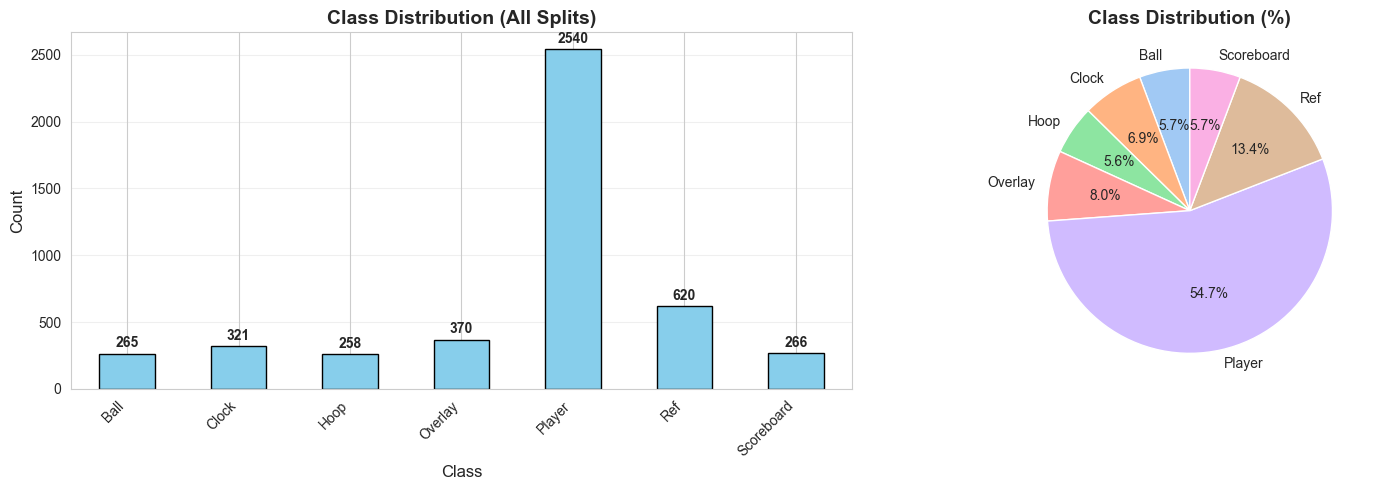


Class Distribution Summary:
            Count
class_name       
Ball          265
Clock         321
Hoop          258
Overlay       370
Player       2540
Ref           620
Scoreboard    266

Most common: Player (2,540 instances)
Least common: Hoop (258 instances)
Class imbalance ratio: 9.84:1


In [34]:
# Class distribution overall
class_counts = all_df['class_name'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot
ax1 = axes[0]
class_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Class Distribution (All Splits)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add counts on bars
for i, v in enumerate(class_counts):
    ax1.text(i, v + max(class_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# Percentage breakdown
ax2 = axes[1]
class_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, 
                   colors=sns.color_palette('pastel'))
ax2.set_ylabel('')
ax2.set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("\nClass Distribution Summary:")
print(class_counts.to_frame(name='Count'))
print(f"\nMost common: {class_counts.idxmax()} ({class_counts.max():,} instances)")
print(f"Least common: {class_counts.idxmin()} ({class_counts.min():,} instances)")
print(f"Class imbalance ratio: {class_counts.max() / class_counts.min():.2f}:1")

#### Bounding Box Size Analysis

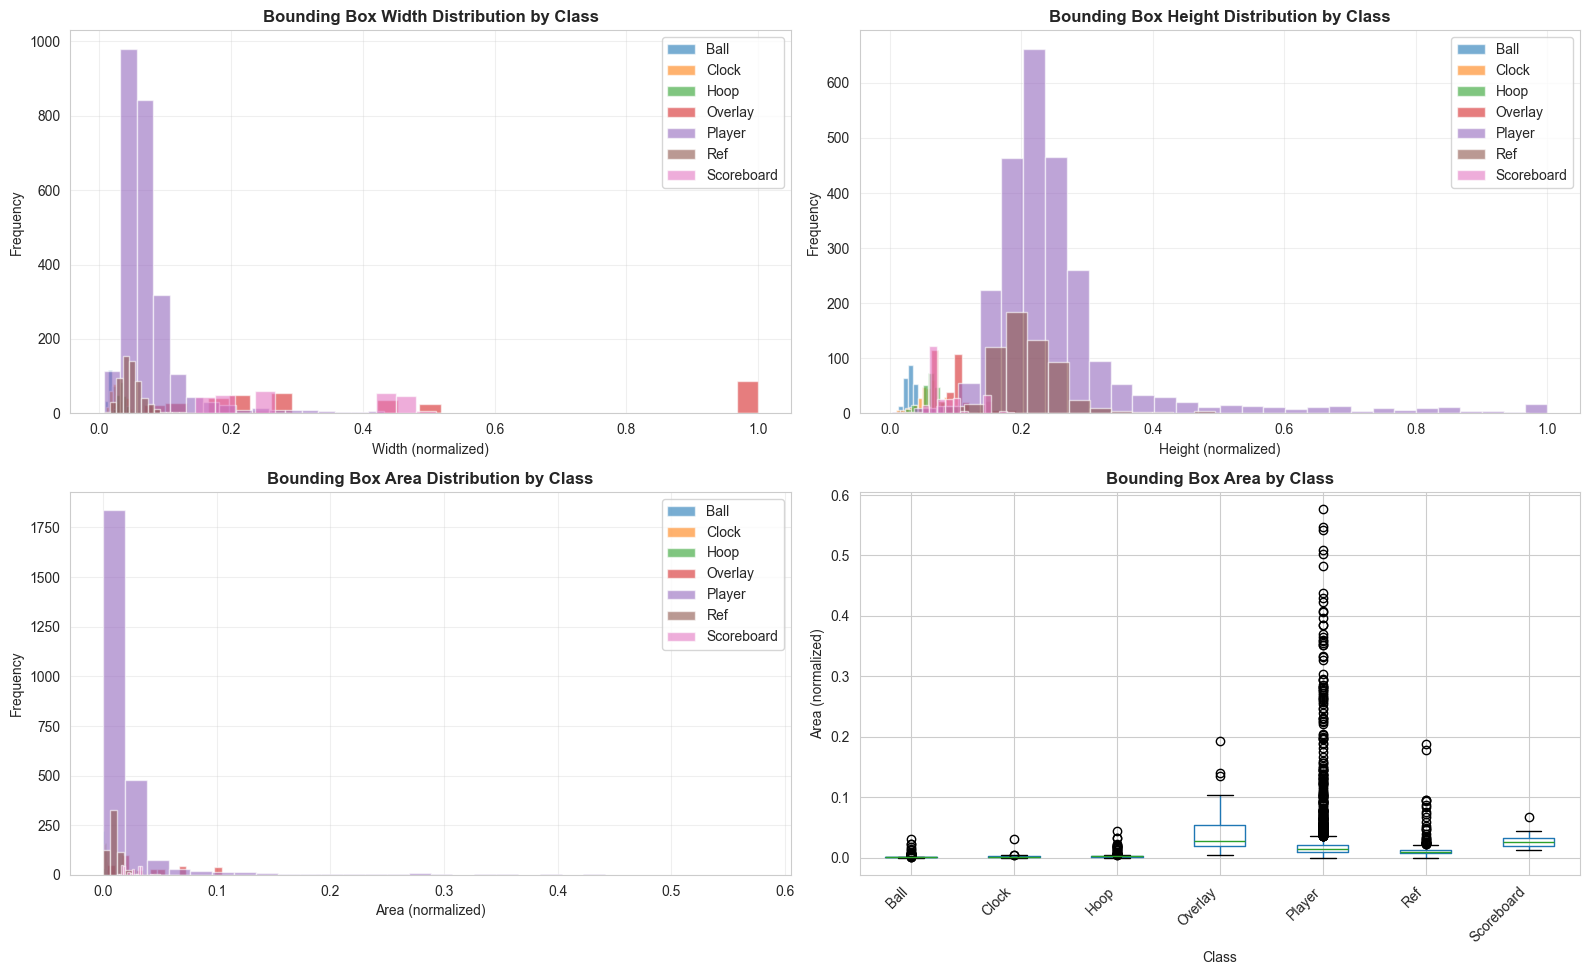


Bounding Box Statistics by Class:
             width                          height                          \
              mean     std     min     max    mean     std     min     max   
class_name                                                                   
Ball        0.0234  0.0190  0.0078  0.1836  0.0408  0.0289  0.0133  0.2391   
Clock       0.0283  0.0121  0.0055  0.1508  0.0610  0.0209  0.0094  0.2078   
Hoop        0.0398  0.0213  0.0102  0.1641  0.0731  0.0354  0.0062  0.2688   
Overlay     0.4405  0.3369  0.0359  1.0000  0.0984  0.0368  0.0508  0.4023   
Player      0.0750  0.0607  0.0062  0.7586  0.2596  0.1351  0.0039  1.0000   
Ref         0.0511  0.0264  0.0070  0.2898  0.2132  0.0717  0.0180  0.9719   
Scoreboard  0.3151  0.1351  0.0836  1.0000  0.0892  0.0376  0.0484  0.4016   

              area                          
              mean     std     min     max  
class_name                                  
Ball        0.0014  0.0033  0.0001  0.0308  
Cloc

In [6]:
# Bounding box size distribution by class
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Width distribution
ax1 = axes[0, 0]
for class_name in class_names:
    class_data = all_df[all_df['class_name'] == class_name]
    if len(class_data) > 0:
        ax1.hist(class_data['width'], alpha=0.6, label=class_name, bins=30)
ax1.set_title('Bounding Box Width Distribution by Class', fontsize=12, fontweight='bold')
ax1.set_xlabel('Width (normalized)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(alpha=0.3)

# Height distribution
ax2 = axes[0, 1]
for class_name in class_names:
    class_data = all_df[all_df['class_name'] == class_name]
    if len(class_data) > 0:
        ax2.hist(class_data['height'], alpha=0.6, label=class_name, bins=30)
ax2.set_title('Bounding Box Height Distribution by Class', fontsize=12, fontweight='bold')
ax2.set_xlabel('Height (normalized)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(alpha=0.3)

# Area distribution
ax3 = axes[1, 0]
for class_name in class_names:
    class_data = all_df[all_df['class_name'] == class_name]
    if len(class_data) > 0:
        ax3.hist(class_data['area'], alpha=0.6, label=class_name, bins=30)
ax3.set_title('Bounding Box Area Distribution by Class', fontsize=12, fontweight='bold')
ax3.set_xlabel('Area (normalized)')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(alpha=0.3)

# Box plot of areas by class
ax4 = axes[1, 1]
all_df.boxplot(column='area', by='class_name', ax=ax4)
ax4.set_title('Bounding Box Area by Class', fontsize=12, fontweight='bold')
ax4.set_xlabel('Class')
ax4.set_ylabel('Area (normalized)')
plt.suptitle('')  # Remove default title
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Statistics by class
print("\nBounding Box Statistics by Class:")
stats = all_df.groupby('class_name')[['width', 'height', 'area']].agg(['mean', 'std', 'min', 'max'])
print(stats.round(4))

#### Objects Per Image Analysis

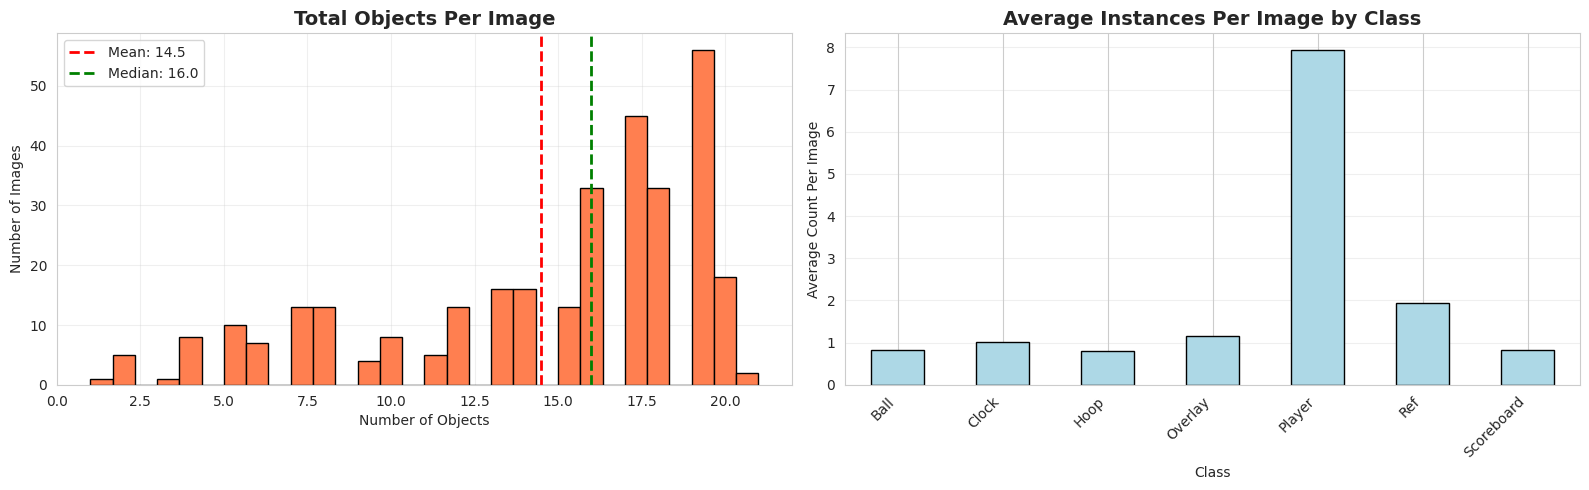


Objects Per Image Statistics:
Mean objects per image: 14.50
Median objects per image: 16.00
Max objects in single image: 21
Min objects in single image: 1

Average instances per image by class:
class_name
Player        7.94
Ref           1.94
Overlay       1.16
Clock         1.00
Scoreboard    0.83
Ball          0.83
Hoop          0.81
dtype: float64


In [6]:
# Count objects per image
objects_per_image = all_df.groupby(['file', 'class_name']).size().unstack(fill_value=0)
total_per_image = objects_per_image.sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Total objects per image
ax1 = axes[0]
total_per_image.hist(bins=30, ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Total Objects Per Image', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Objects')
ax1.set_ylabel('Number of Images')
ax1.axvline(total_per_image.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {total_per_image.mean():.1f}')
ax1.axvline(total_per_image.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {total_per_image.median():.1f}')
ax1.legend()
ax1.grid(alpha=0.3)

# Each class per image
ax2 = axes[1]
objects_per_image.mean().plot(kind='bar', ax=ax2, color='lightblue', edgecolor='black')
ax2.set_title('Average Instances Per Image by Class', fontsize=14, fontweight='bold')
ax2.set_xlabel('Class')
ax2.set_ylabel('Average Count Per Image')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObjects Per Image Statistics:")
print(f"Mean objects per image: {total_per_image.mean():.2f}")
print(f"Median objects per image: {total_per_image.median():.2f}")
print(f"Max objects in single image: {total_per_image.max()}")
print(f"Min objects in single image: {total_per_image.min()}")

print("\nAverage instances per image by class:")
print(objects_per_image.mean().sort_values(ascending=False).round(2))

#### Player and Ball Specific Analysis

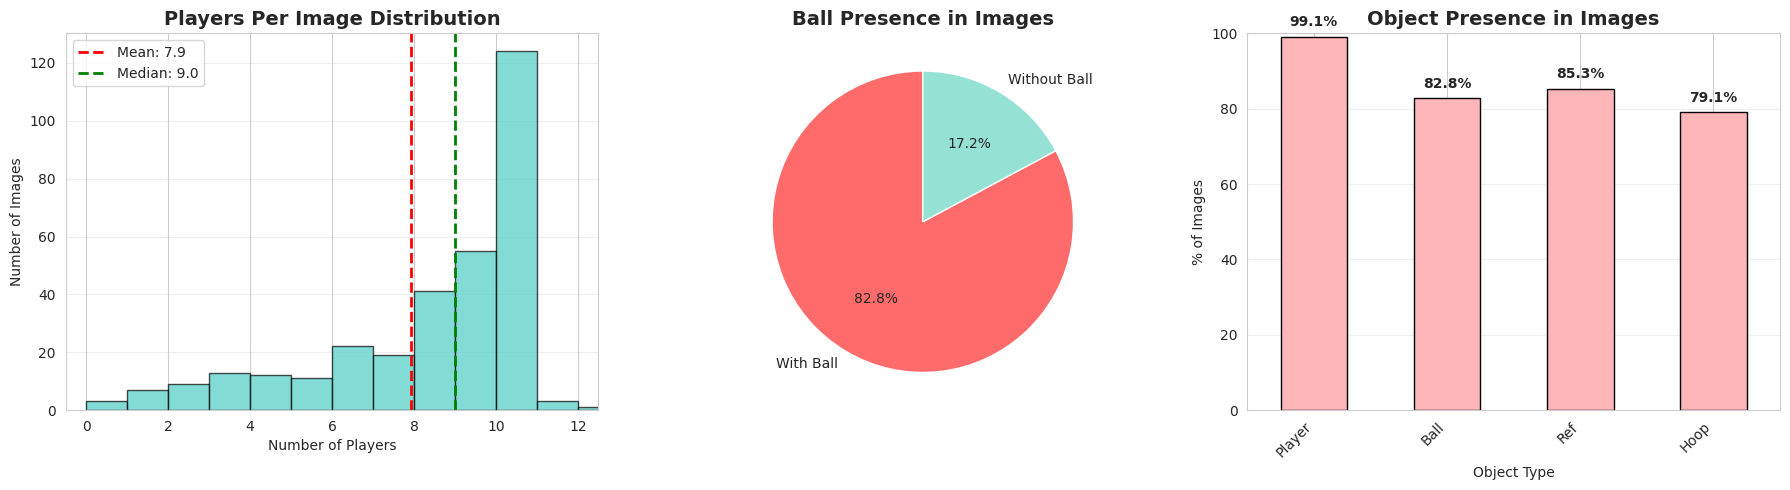


PLAYER STATISTICS
Average players per image: 7.94
Median players per image: 9
Max players in single image: 12
Min players in single image: 0
Images with 0 players: 3 (0.9%)
Most common player count: 10 players

BALL STATISTICS
Images with ball: 265 / 320 (82.8%)
Images without ball: 55 / 320 (17.2%)

OBJECT PRESENCE SUMMARY
Player      :  99.1% of images
Ball        :  82.8% of images
Ref         :  85.3% of images
Hoop        :  79.1% of images


In [7]:
# Analyze players per image
players_per_image = objects_per_image['Player'] if 'Player' in objects_per_image.columns else pd.Series(dtype=int)

# Analyze ball presence
images_with_ball = (objects_per_image['Ball'] > 0).sum() if 'Ball' in objects_per_image.columns else 0
total_images = len(objects_per_image)
ball_percentage = (images_with_ball / total_images * 100) if total_images > 0 else 0

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram: Players per image
ax1 = axes[0]
if len(players_per_image) > 0:
    players_per_image.hist(bins=range(0, int(players_per_image.max()) + 2), 
                           ax=ax1, color='#4ECDC4', edgecolor='black', alpha=0.7)
    ax1.set_title('Players Per Image Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Number of Players')
    ax1.set_ylabel('Number of Images')
    ax1.axvline(players_per_image.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {players_per_image.mean():.1f}')
    ax1.axvline(players_per_image.median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {players_per_image.median():.1f}')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_xlim(-0.5, players_per_image.max() + 0.5)

# Pie chart: Images with vs without ball
ax2 = axes[1]
ball_data = pd.Series({
    'With Ball': images_with_ball,
    'Without Ball': total_images - images_with_ball
})
colors = ['#FF6B6B', '#95E1D3']
ball_data.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_ylabel('')
ax2.set_title('Ball Presence in Images', fontsize=14, fontweight='bold')

# Bar chart: Ref presence
ax3 = axes[2]
key_objects = ['Player', 'Ball', 'Ref', 'Hoop']
presence_stats = []
for obj in key_objects:
    if obj in objects_per_image.columns:
        has_obj = (objects_per_image[obj] > 0).sum()
        pct = (has_obj / total_images * 100)
        presence_stats.append({'Object': obj, 'Percentage': pct})

if presence_stats:
    presence_df = pd.DataFrame(presence_stats)
    presence_df.plot(x='Object', y='Percentage', kind='bar', ax=ax3, 
                     color='#FFB6B9', edgecolor='black', legend=False)
    ax3.set_title('Object Presence in Images', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Object Type')
    ax3.set_ylabel('% of Images')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
    ax3.grid(axis='y', alpha=0.3)
    ax3.set_ylim(0, 100)
    
    # Add percentage labels on bars
    for i, v in enumerate(presence_df['Percentage']):
        ax3.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("PLAYER STATISTICS")
print("="*60)
if len(players_per_image) > 0:
    print(f"Average players per image: {players_per_image.mean():.2f}")
    print(f"Median players per image: {players_per_image.median():.0f}")
    print(f"Max players in single image: {players_per_image.max()}")
    print(f"Min players in single image: {players_per_image.min()}")
    print(f"Images with 0 players: {(players_per_image == 0).sum()} ({(players_per_image == 0).sum()/len(players_per_image)*100:.1f}%)")
    print(f"Most common player count: {players_per_image.mode().values[0]} players")

print("\n" + "="*60)
print("BALL STATISTICS")
print("="*60)
print(f"Images with ball: {images_with_ball} / {total_images} ({ball_percentage:.1f}%)")
print(f"Images without ball: {total_images - images_with_ball} / {total_images} ({100-ball_percentage:.1f}%)")

print("\n" + "="*60)
print("OBJECT PRESENCE SUMMARY")
print("="*60)
for obj_stat in presence_stats:
    print(f"{obj_stat['Object']:12s}: {obj_stat['Percentage']:5.1f}% of images")

#### Train/Valid/Test Split Analysis

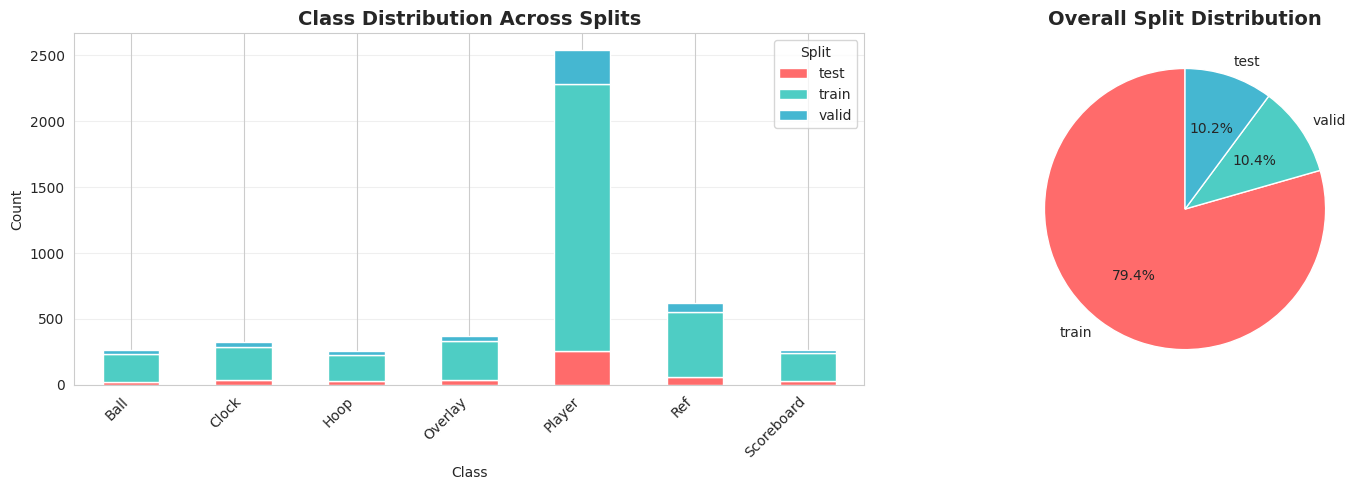


Split Distribution:
class_name  Ball  Clock  Hoop  Overlay  Player  Ref  Scoreboard
split                                                          
test          24     37    25       36     260   61          28
train        213    249   203      294    2021  495         211
valid         28     35    30       40     259   64          27

Total images per split:
  Train: 256 images, 3,686 annotations
  Valid: 32 images, 483 annotations
  Test: 32 images, 471 annotations


In [8]:
# Analyze split distribution
split_stats = all_df.groupby(['split', 'class_name']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Stacked bar chart
ax1 = axes[0]
split_stats.T.plot(kind='bar', stacked=True, ax=ax1, 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Class Distribution Across Splits', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='Split')
ax1.grid(axis='y', alpha=0.3)

# Split percentages
ax2 = axes[1]
split_totals = all_df['split'].value_counts()
split_totals.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                   colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_ylabel('')
ax2.set_title('Overall Split Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSplit Distribution:")
print(split_stats)
print(f"\nTotal images per split:")
for split in ['train', 'valid', 'test']:
    split_data = all_df[all_df['split'] == split]
    n_images = split_data['file'].nunique()
    n_annotations = len(split_data)
    print(f"  {split.capitalize()}: {n_images:,} images, {n_annotations:,} annotations")

#### Class Co-occurrence Analysis

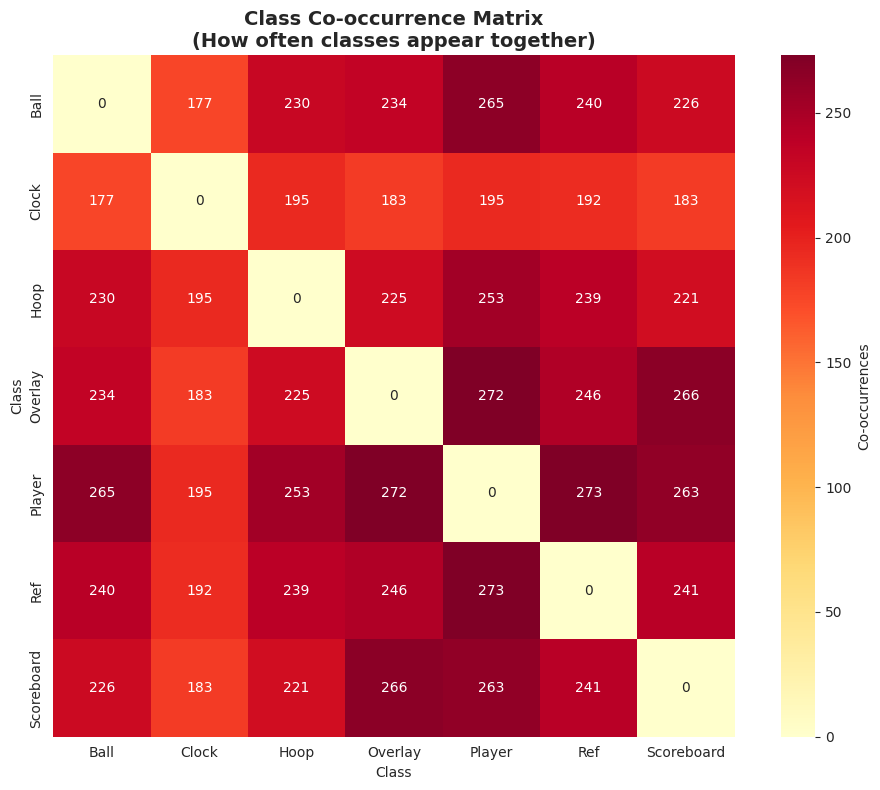


Most Common Class Pairs:
  Player + Ref: 273 images
  Overlay + Player: 272 images
  Overlay + Scoreboard: 266 images
  Ball + Player: 265 images
  Player + Scoreboard: 263 images
  Hoop + Player: 253 images
  Overlay + Ref: 246 images
  Ref + Scoreboard: 241 images
  Ball + Ref: 240 images
  Hoop + Ref: 239 images


In [9]:
# Create co-occurrence matrix
from itertools import combinations

# Get which classes appear in each image
class_per_image = all_df.groupby('file')['class_name'].apply(set)

# Build co-occurrence matrix
cooccurrence = pd.DataFrame(0, index=class_names, columns=class_names)

for classes_in_image in class_per_image:
    for class1, class2 in combinations(classes_in_image, 2):
        cooccurrence.loc[class1, class2] += 1
        cooccurrence.loc[class2, class1] += 1

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='YlOrRd', 
            square=True, cbar_kws={'label': 'Co-occurrences'})
plt.title('Class Co-occurrence Matrix\n(How often classes appear together)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

print("\nMost Common Class Pairs:")
# Get upper triangle values
pairs = []
for i in range(len(class_names)):
    for j in range(i+1, len(class_names)):
        pairs.append((class_names[i], class_names[j], cooccurrence.iloc[i, j]))

pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)
for class1, class2, count in pairs_sorted[:10]:
    print(f"  {class1} + {class2}: {int(count):,} images")

### Small-object difficulty analysis (Ball vs Player)

/tmp/ipykernel_26935/1980926266.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)


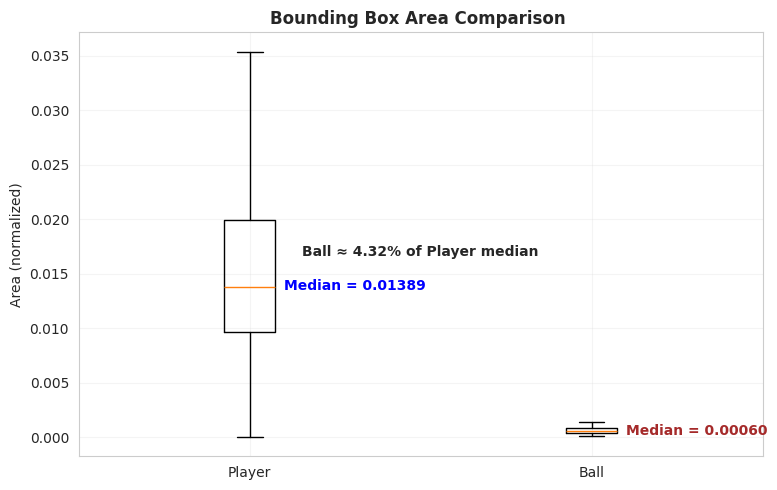

Counts:
  Player: 2540
  Ball  : 265

Key size statistics (normalized bbox area):
  Median Player area: 0.013886
  Median Ball area  : 0.000601
  Ball median is 4.32% of Player median

Small-object tail (Ball):
  Bottom 10% of balls are smaller than 0.000316
  Bottom 5%  of balls are smaller than 0.000259


In [10]:
import matplotlib.pyplot as plt
import numpy as np

players = all_df[all_df['class_name'] == 'Player']['area']
balls   = all_df[all_df['class_name'] == 'Ball']['area']

p99 = players.quantile(0.99)
players_clip = players[players <= p99]

ball_med = balls.median()
player_med = players.median()
ratio_pct = (ball_med / player_med) * 100

data = [players_clip.values, balls.values]
labels = ['Player', 'Ball']

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=labels, showfliers=False)

plt.title("Bounding Box Area Comparison ", fontsize=12, fontweight='bold')
plt.ylabel("Area (normalized)")
plt.grid(alpha=0.2)


plt.text(1.1, player_med, f"Median = {player_med:.5f}", va='center', color='blue', fontweight='bold')
plt.text(2.1, ball_med,   f"Median = {ball_med:.5f}", va='center', color='brown', fontweight='bold')


y_text = max(player_med, ball_med) * 1.2
plt.text(1.5, y_text, f"Ball ≈ {ratio_pct:.2f}% of Player median",
         ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
print("Counts:")
print(f"  Player: {len(players)}")
print(f"  Ball  : {len(balls)}")

print("\nKey size statistics (normalized bbox area):")
print(f"  Median Player area: {player_med:.6f}")
print(f"  Median Ball area  : {ball_med:.6f}")
print(f"  Ball median is {ratio_pct:.2f}% of Player median")

print("\nSmall-object tail (Ball):")
print(f"  Bottom 10% of balls are smaller than {balls.quantile(0.10):.6f}")
print(f"  Bottom 5%  of balls are smaller than {balls.quantile(0.05):.6f}")


The ball bounding boxes are significantly smaller than player bounding boxes, with a median ball area is only about 4% of the player median, indicating that ball detection is a small-object detection problem. The large scale gap between ball and player bounding boxes highlights that ball detection is significantly more difficult and requires careful modeling of small objects.

### Spatial distribution (2D density heatmaps)

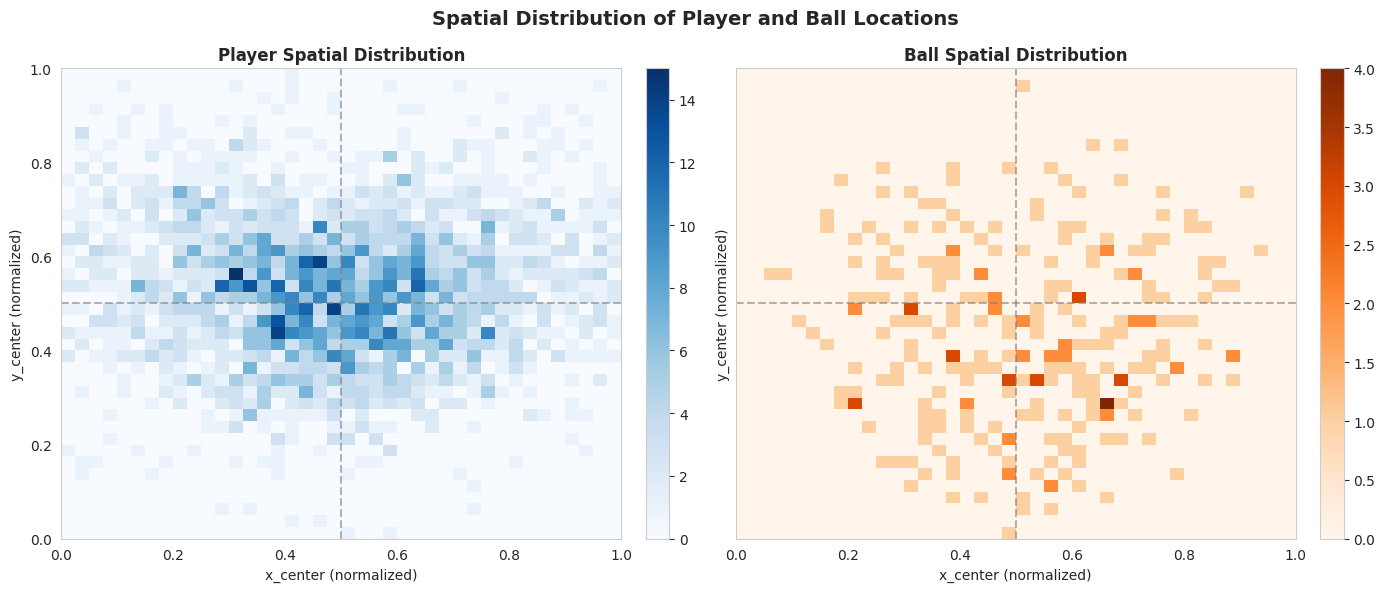

Balls in center region: 85 / 265 (32.08%)


In [11]:
bins = 40
key_classes = ['Player', 'Ball']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

for i, cname in enumerate(key_classes):
    class_data = all_df[all_df['class_name'] == cname]

    h = axes[i].hist2d(
        class_data['x_center'],
        class_data['y_center'],
        bins=bins,
        range=[[0,1],[0,1]],
        cmap='Blues' if cname == 'Player' else 'Oranges'
    )

    axes[i].set_title(f"{cname} Spatial Distribution", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("x_center (normalized)")
    axes[i].set_ylabel("y_center (normalized)")
    axes[i].grid(alpha=0.2)

    # Add center reference lines
    axes[i].axhline(0.5, color='gray', linestyle='--', alpha=0.6)
    axes[i].axvline(0.5, color='gray', linestyle='--', alpha=0.6)

    plt.colorbar(h[3], ax=axes[i], fraction=0.046, pad=0.04)

plt.suptitle("Spatial Distribution of Player and Ball Locations", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

balls = all_df[all_df['class_name'] == 'Ball']
center_region = balls[
    (balls['x_center'] >= 0.33) & (balls['x_center'] <= 0.67) &
    (balls['y_center'] >= 0.33) & (balls['y_center'] <= 0.67)
]

print(f"Balls in center region: {len(center_region)} / {len(balls)} ({len(center_region)/len(balls):.2%})")


Both players and the ball are most frequently detected near the center of the frame, with player positions forming a tighter cluster and ball positions appearing more dispersed. This reveals strong spatial structure and camera bias in the dataset, supporting future work on court normalization and higher-level metrics such as player spacing and player gravity.